In [26]:
import os
import pandas as pd

workdir = '/mnt/f/My Drive/PARPi binder paper/Figures/Fig2_binding_kd/vel_nir_mef_Kd_UV/vel_nir_mef_Kd_UV_raw_data/'

lig_conc = pd.read_csv(workdir + '20230514_vel_conc.csv')

data = pd.read_csv(workdir + '20230514_vel_titri2-2.csv')

In [3]:
for name in lig_conc.columns[2:]:
    x = lig_conc[name][300:400]  - lig_conc[lig_conc.columns[1]][300:400]
    y = sum(x)/len(x)
    lig_conc[name] = lig_conc[name] - y

313


(-0.05, 0.5)

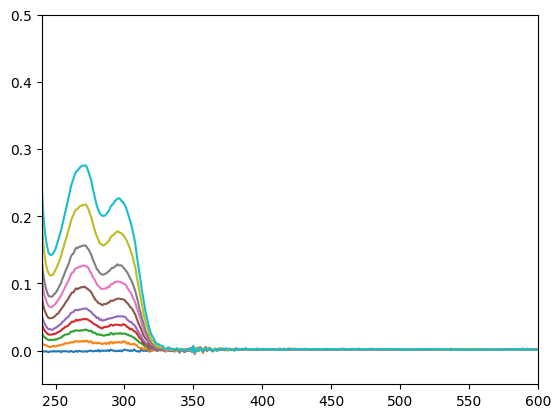

In [5]:
lig_adds = [0, 2, 4, 6, 8, 12, 16, 20, 28, 36]
lig_xs = [x*1500/(2000+x) for x in lig_adds]

lig_ys = lig_conc.iloc[313-200, 1:]

print(lig_conc.iloc[313-200, 0])

import matplotlib.pyplot as plt
fig,ax = plt.subplots()
for name in lig_conc.columns[1:]:
    ax.plot(lig_conc[lig_conc.columns[0]], lig_conc[name])

plt.xlim([240, 600])
plt.ylim([-0.05, 0.5])


[[ 0.        ]
 [ 1.4985015 ]
 [ 2.99401198]
 [ 4.48654038]
 [ 5.97609562]
 [ 8.94632207]
 [11.9047619 ]
 [14.85148515]
 [20.71005917]
 [26.52259332]]
score: 0.998767121846134
lig intercept_: -0.0008141930661891075
lig coef_: [0.00322939]


(-0.05, 0.3)

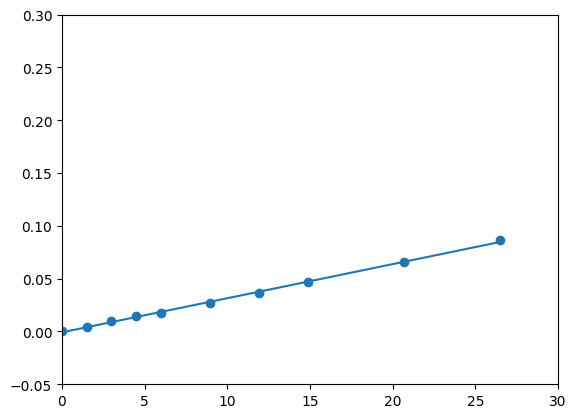

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
lig_xs_re = np.array(lig_xs).reshape(-1, 1)
lig_reg_317 = LinearRegression().fit(lig_xs_re, lig_ys)
print(lig_xs_re)
print('score: ' + str(lig_reg_317.score(lig_xs_re, lig_ys)))
print('lig intercept_: ' + str(lig_reg_317.intercept_))
print('lig coef_: '+ str(lig_reg_317.coef_))

fig,ax = plt.subplots()
ax.scatter(lig_xs, lig_ys)
lig_ys_317_pred = np.array([lig_reg_317.predict(np.array(xr).reshape(1, -1)) for xr in lig_xs_re])

ax.plot(lig_xs_re, lig_ys_317_pred)
plt.xlim([0, 30])
plt.ylim([-0.05, 0.3])

In [18]:
for name in data.columns[2:]:
    x = data[name][300:400]  - data[data.columns[1]][300:400]
    y = sum(x)/len(x)
    data[name] = data[name] - y

In [27]:
data.columns

Index(['Wavelength (nm)', 'H2O', 'prot_5uM', 'vel_1-2', 'vel_2-2', 'vel_3-2',
       'vel_4-2', 'vel_5-2', 'vel_6-2', 'vel_7-2', 'vel_8-2', 'vel_9-2',
       'vel_10-2', 'vel_12-2', 'vel_14-2', 'vel_16-2', 'vel_18-2', 'vel_20-2',
       'vel_24-2', 'vel_28-2', 'vel_32-2', 'vel_40-2'],
      dtype='object')

(-0.05, 0.2)

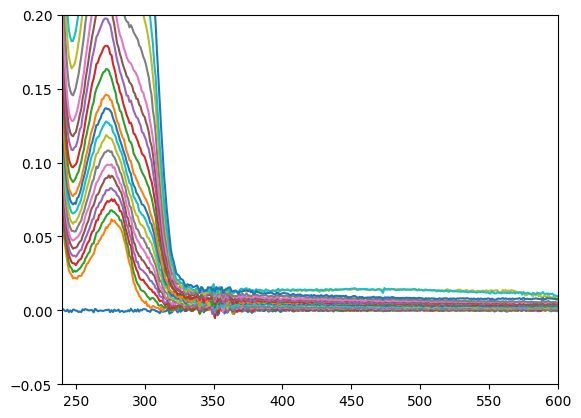

In [28]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
for name in data.columns[1:]:
    ax.plot(data[data.columns[0]], data[name])

plt.xlim([240, 600])
plt.ylim([-0.05, 0.2])

titri_adds: 
20
[0.0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9, 1.05, 1.2, 1.35, 1.5, 1.8, 2.1, 2.4, 2.7, 3.0, 3.6, 4.2, 4.8, 6.0]
real_titri_ys
20


(-0.01, 0.02)

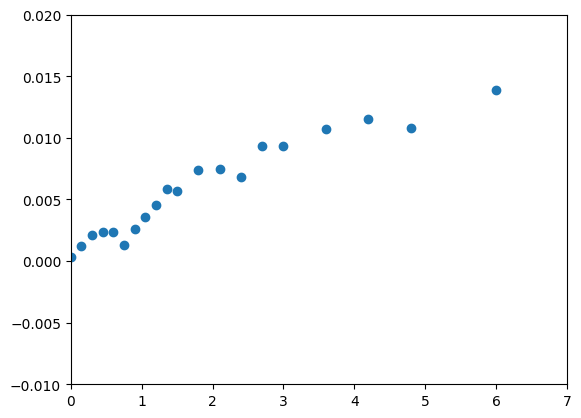

In [29]:
titri_adds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 24, 28, 32, 40]
#print('titri_adds-----------------------------------')
print('titri_adds: '.format(len(titri_adds)))
print(len(titri_adds))

ratio = [x*1500/500/20 for x in titri_adds]
print(ratio)

lig_titri_xs = np.array([x*1500/(x+2000) for x in titri_adds]).reshape(-1, 1)
#print('lig_titri_xs-----------------------------------')
#print(lig_titri_xs)

lig_titri_ys = lig_reg_317.predict(lig_titri_xs)
#print('lig_titri_ys-----------------------------------')
#print(lig_titri_ys)

real_titri_ys = data.iloc[313-200, 2:]
#print('real_titri_ys-----------------------------------')
print('real_titri_ys'.format(len(real_titri_ys)))
print(len(real_titri_ys))

corr_titri_ys = real_titri_ys - lig_titri_ys

fig,ax = plt.subplots()
ax.scatter(ratio, corr_titri_ys)


plt.xlim([0, 7])
plt.ylim([-0.01, 0.02])

In [ ]:
result = pd.DataFrame({'conc':titri_adds, 'abs':corr_titri_ys.values})
result.to_csv(workdir + 'nir_230418_processed.csv')